In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sciann as sn
from sciann.utils.math import diff, sign, sin

In [56]:
x_data, t_data = np.meshgrid(
    np.linspace(-1, 1, 50), 
    np.linspace(0, 1, 50)
)

In [57]:
t= sn.Variable('t')
x= sn.Variable('x')
u = sn.Functional('u', [t,x], 8*[20], 'tanh')

* Loss Function/Governing PDE

In [58]:
L1= sn.rename(diff(u,t)+u*diff(u, x)-(0.01/np.pi)*diff(u,x,order=2), 'L1')

* Imposing Boundary Conditions

In [59]:
tolerance=0.001
L2= (1-sign(t-tolerance))*(u+sn.sin(np.pi*x))
L3= (1-sign(x-(-1+tolerance)))*u
L4= (1+sign(x-(1-tolerance)))*u

In [60]:
m= sn.SciModel([t,x], [L1, L2, L3, L4], loss_func='mse', optimizer='adam')

In [61]:
h= m.train([t_data, x_data], ['zeros', 'zeros', 'zeros', 'zeros'], epochs=1000, learning_rate=0.002, verbose=0)


Total samples: 2500 
Batch size: 64 
Total batches: 40 


Epoch 348: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.

Epoch 566: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 666: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 766: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 866: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 966: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.


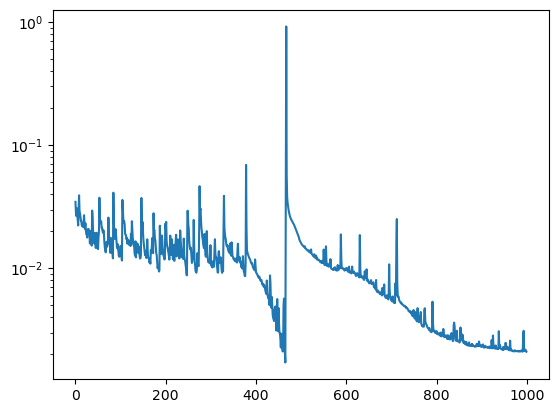

In [62]:
plt.semilogy(h.history['loss'])

In [63]:
u_pred = u.eval([t_data, x_data])

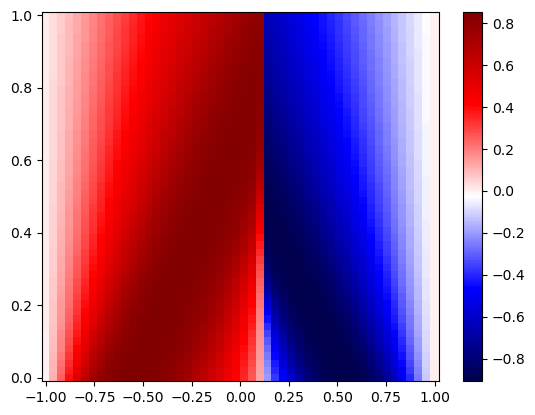

In [64]:
im= plt.pcolor(x_data, t_data, u_pred, cmap='seismic')
plt.colorbar(im)